<a href="https://colab.research.google.com/github/SamiEzz/MineDor/blob/main/Quantitative_Trading_with_Python_Loading_Data_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup
Before we dive deep into quantitative trading, we should have the required data that we want to work with. In this scenario, we'll focus on the entire process of collecting high-quality data from different sources and load them into pandas dataframes.

Some of the important sources of data you can explore:

- Yahoo Finance
- Quandl
- Intrinio

We are only going to cover Yahoo finance and pandas-datareader in this scenario, but you can check out documentation of the other two. It's pretty simple and straight forward.

So, let's set up our environment first.

Let's first execute installation command in the terminal:

The next step is to install the required libraries that will facilitate data from Yahoo Finance and FRED (Federal Reserve Economic Data).


In [ ]:
!pip install yfinance pandas-datareader


And our environment is all set up and we are ready to start gathering data now.

Extracting data from Yahoo Finance
With the environment all set now, let's load the end-of-day stock pricing data. For this entire series, we'll be working with the Apple stock prices from 2011-2020.

Now, import the required libraries:


In [ ]:

import pandas as pd
import yfinance as yf


To download the data from Yahoo Finance, you need to pass the stock symbol (AAPL in our case), starting date, ending date, and progress to set the progress bar visibility:


In [ ]:
df_apple = yf.download('AAPL',
                       start='2011-01-01',
                       end='2020-09-30',
                       progress=False)


This will give us the data in a pandas dataframe which we can inspect using:


In [ ]:
print(df_apple.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2011-01-03  11.630000  11.795000  11.601429  11.770357  10.121364  445138400
2011-01-04  11.872857  11.875000  11.719643  11.831786  10.174186  309080800
2011-01-05  11.769643  11.940714  11.767857  11.928571  10.257413  255519600
2011-01-06  11.954286  11.973214  11.889286  11.918929  10.249121  300428800
2011-01-07  11.928214  12.012500  11.853571  12.004286  10.322517  311931200


We have the Apple EOD stock pricing data in a dataframe containing daily Open, High, Low, and Close (OHLC) prices, as well as the adjusted close price and volume.

Let's now look at another possible method of downloading the historical stock pricing data.

# Extracting data from pandas-datareader

Another way we can download the same data is using the pandas-datareader library that we installed.

In fact, pandas-datareader provides functions to extract data from various internet sources in a pandas dataframe. Currently, the following sources are supported by them:

- Tiingo
- IEX
- Alpha Vantage
- Enigma
- Quandl
- St.Louis FED (FRED)
- Kenneth French’s data library
- World Bank
- OECD
- Eurostat
- Thrift Savings Plan
- Nasdaq Trader symbol definitions
- Stooq
- MOEX
- Naver Finance
- For this example, let's try to extract data from Quandl.

Similar to what we did in the previous step, here's how we'll download data here:

#

We have the same Apple stock prices for the same time period with same columns(features).

In [ ]:
import pandas_datareader.data as pdr

df_apple = pdr.DataReader('AAPL',
                       'quandl',
                       '2011-01-01',
                       '2020-09-30',
                       api_key='yuqp72Y_-GpAsrjQEXfL')

# his will give us the data in a pandas dataframe which we can inspect using:

# First five rows
print(df_apple.head())

# Note: 
# Incase if an error arises with pdr.DataReader due to the api_key argument, 
# please create an account on quandl to obtain your own personal API key.

              Open    High     Low  ...  AdjLow  AdjClose   AdjVolume
Date                                ...                              
2018-03-27  173.68  175.15  166.92  ...  166.92   168.340  38962839.0
2018-03-26  168.07  173.10  166.44  ...  166.44   172.770  36272617.0
2018-03-23  168.39  169.92  164.94  ...  164.94   164.940  40248954.0
2018-03-22  170.00  172.68  168.60  ...  168.60   168.845  41051076.0
2018-03-21  175.04  175.09  171.26  ...  171.26   171.270  35247358.0

[5 rows x 12 columns]


In [ ]:
# Information about the dataframe
print(df_apple.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2018-03-27 to 2011-01-03
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1818 non-null   float64
 1   High        1818 non-null   float64
 2   Low         1818 non-null   float64
 3   Close       1818 non-null   float64
 4   Volume      1818 non-null   float64
 5   ExDividend  1818 non-null   float64
 6   SplitRatio  1818 non-null   float64
 7   AdjOpen     1818 non-null   float64
 8   AdjHigh     1818 non-null   float64
 9   AdjLow      1818 non-null   float64
 10  AdjClose    1818 non-null   float64
 11  AdjVolume   1818 non-null   float64
dtypes: float64(12)
memory usage: 184.6 KB
None


# Initial Exploration of Data
We have the data loaded into dataframes but we don't know much about what it contains and what each column represents.

We saw we have the following columns in the previous step:

- Date: specifies trading date
- Open: opening price
- High: maximum price during the day
- Low: minimum price during the day
- Close: close price adjusted for splits
- Volume: number of shares traded on a particular day
- Split: number of shares after split / number of shares before
- Dividend: number of shares after dividend / number of shares before
- AdjOpen: adjusted opening price for that day
- AdjHigh: adjusted maximum price for that day
- AdjLow: adjusted lowest price for that day
- AdjClose: adjusted close price adjusted for both dividends and splits
- AdjVolume: adjusted volume of shares traded

To get a slightly deeper understanding of the prices and volumes, we should have a good understanding of the summary statistics of each column:

In [ ]:
print(df_apple.describe())


              Open         High  ...     AdjClose     AdjVolume
count  1818.000000  1818.000000  ...  1818.000000  1.818000e+03
mean    293.583947   296.184716  ...    93.590007  7.538906e+07
std     191.352004   193.057581  ...    36.015008  5.385936e+07
min      90.000000    90.700000  ...    40.523015  1.147592e+07
25%     115.922500   116.735000  ...    65.139696  3.497941e+07
50%     173.260000   174.685000  ...    90.851617  6.085693e+07
75%     464.353675   468.237500  ...   114.830021  9.970800e+07
max     702.410000   705.070000  ...   181.720000  4.702495e+08

[8 rows x 12 columns]


Next, we should explore the movement of prices of the Apple stock over the years.

Let's plot the adjusted closing prices on the chart:

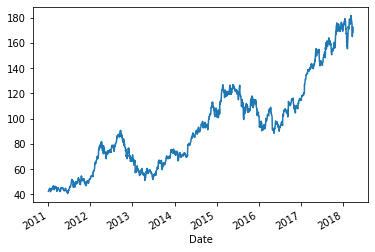

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt = df_apple['AdjClose'].plot()
fig.savefig('close_plot.png')

Looking at the summary statistics and movement of prices give us a high-level picture of how the apple stock has been performing for the past ~10 years.


Here's a quick summary of key takeaways from this notebook :

- We saw how we can get access to historical stock pricing datasets from different credible sources.
- We learned to peek at the data using the head() method and look at its information using the info() method.
- Captured the descriptive statistics option using the describe() method 
- and plotted the prices using matplotlib library.